In [1]:
from src.data.data_loader import get_dataloaders
from src.utils.seed import set_seed

In [2]:
set_seed(42)

In [3]:
train_loader, val_loader, test_loader = get_dataloaders(
    batch_size=32,
    num_workers=4
)

In [4]:
images, labels = next(iter(train_loader))

print(images.shape)  # [B, 3, H, W]
print(labels.shape)  # [B]

/Users/sreeram/Developer/Personal/paper-replications/vision-transformer-from-scratch/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:1118: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


torch.Size([32, 3, 224, 224])
torch.Size([32])


In [5]:
import random 
import matplotlib.pyplot as plt 

dataset = train_loader.dataset

if hasattr(dataset, "dataset"):
    dataset = dataset.dataset 

class_names = dataset.classes
num_classes = len(class_names)

print(f"Total number of classes: {num_classes}")
print(f"Class names: {class_names}")

Total number of classes: 37
Class names: ['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair', 'Chihuahua', 'Egyptian Mau', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu', 'Siamese', 'Sphynx', 'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']


In [6]:
class_samples = {}

indices = list(range(len(dataset)))
random.shuffle(indices)

for idx in indices:
    img, label = dataset[idx]
    if label not in class_samples:
        class_samples[label] = img
    
    if len(class_samples) == num_classes:
        break


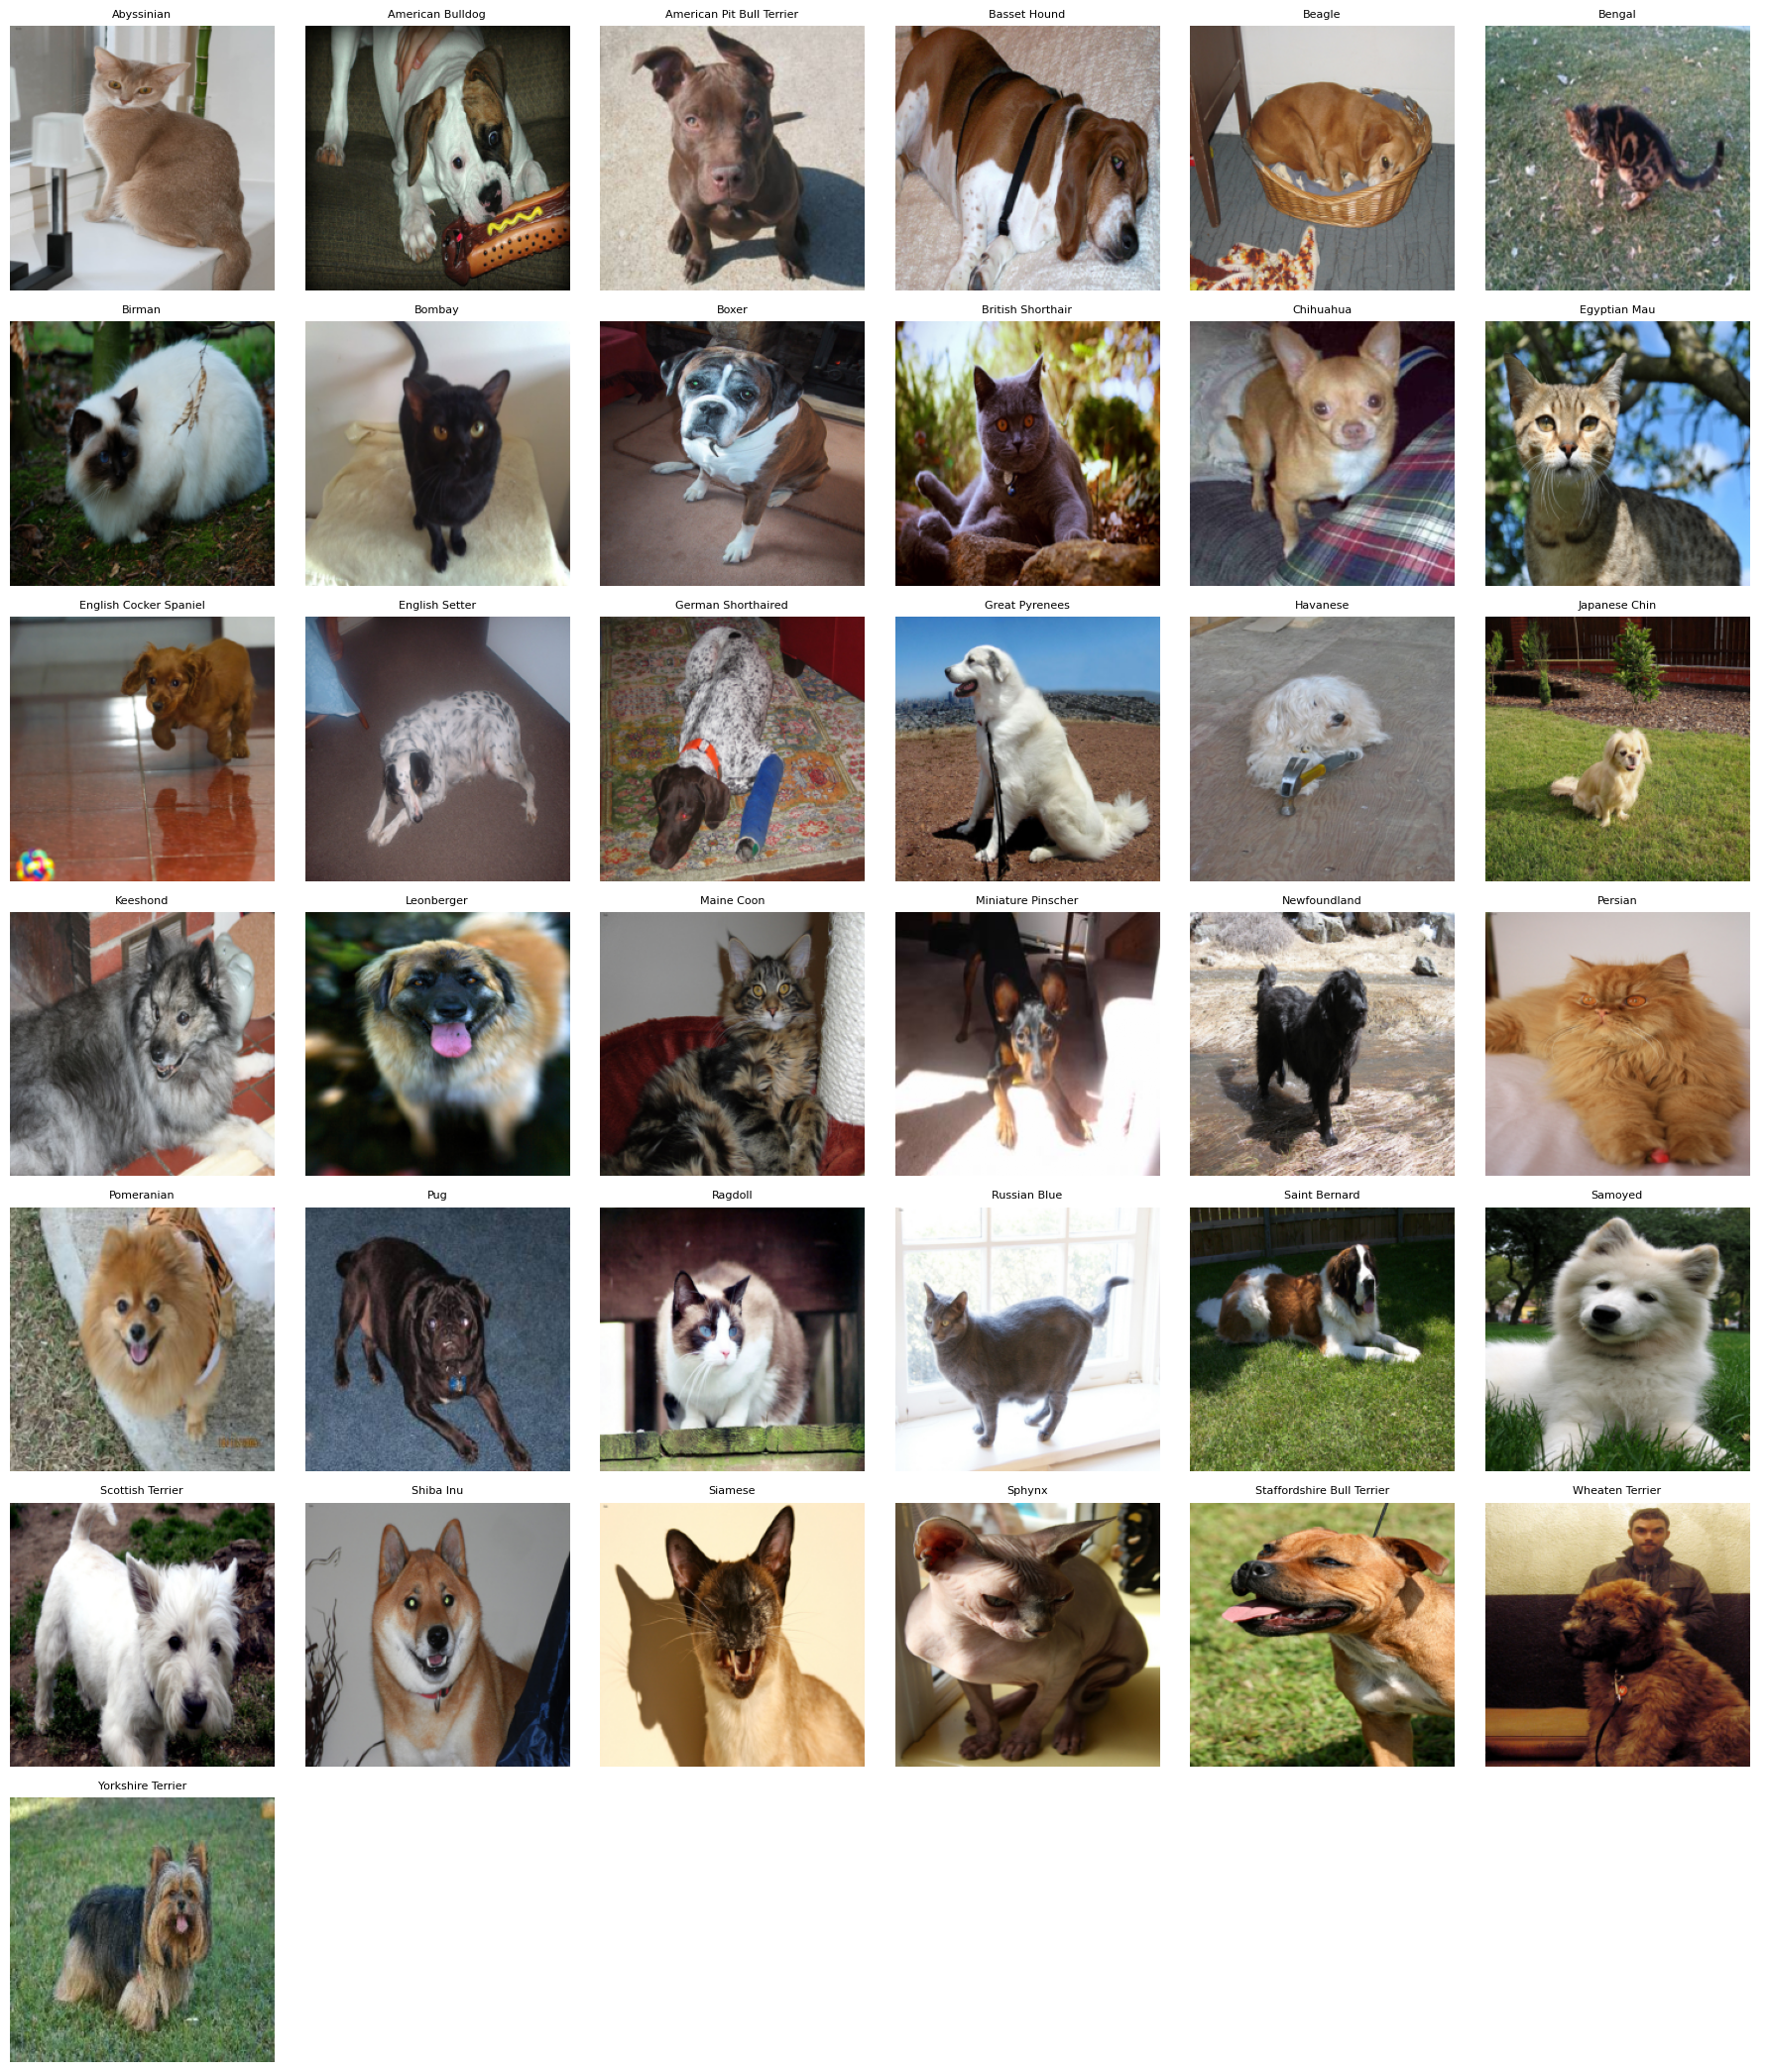

In [7]:
cols = 6
rows = (num_classes + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, (label, img) in enumerate(sorted(class_samples.items())):
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(class_names[label], fontsize=8)
    axes[i].axis("off")

# Turn off extra empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [8]:
# Hyperparameters 



In [9]:
# Get a batch of images
image_batch, label_batch = next(iter(train_loader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

/Users/sreeram/Developer/Personal/paper-replications/vision-transformer-from-scratch/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:1118: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


(torch.Size([3, 224, 224]), tensor(20))

In [18]:

import importlib
import src.data.preprocessing as preprocessing
importlib.reload(preprocessing)

PatchEmbedding = preprocessing.PatchEmbedding


In [19]:
# Patch and preprocess image


patchify = PatchEmbedding(in_channels=3,patch_size=16,embedding_dim=768)

print(f"Input image shape: {image.unsqueeze(0).shape}")
patched_embedded_image = patchify(image.unsqueeze(0))
print(f"Output patch embedding shape: {patched_embedded_image.shape}")


Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])
